Problem Statement: Using the dataset build a machine learning model that can predict home prices based on square feet area.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/homeprices.csv')

In [ ]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


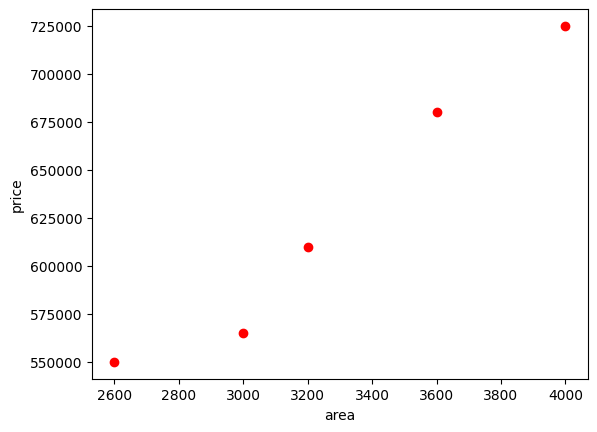

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color = 'red')

In [ ]:
df1 = df.drop('price', axis = 'columns')
df1

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [ ]:
df2 = df.price
df2

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [ ]:
#training the linear regression model
model = linear_model.LinearRegression()
model.fit(df1,df2)

LinearRegression()

In [ ]:
# Predict price of a home with area = 3300 sqr ft
model.predict([[3300]])

array([628715.75342466])

In [ ]:
model.coef_ #coeeficient(slope m) of the model

array([135.78767123])

In [ ]:
model.intercept_ #intercept(b)

180616.43835616432

Y=m⋅X+b

The model's prediction for the home price based on the area is calculated as follows:

predicted_price
=
3300
×
135.78767123
+
180616.43835616432

m-->135.78
X-->3300
b-->180616.43



In [ ]:
model.predict([[5000]])

array([859554.79452055])

Generate CSV file with list of home price predictions

In [ ]:
new_df = pd.read_csv('/content/areas.csv')
new_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [ ]:
prediction = model.predict(new_df)
prediction

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [ ]:
new_df['prices'] = prediction  #adding the preiction values to our table by creating new column
new_df.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [ ]:
#loading the precitions into "predictions.csv" file
new_df.to_csv('/content/predictions.csv')